In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

qpo_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/older/data/processed/2022/meta_qpo/motta_cleaned.csv?token=GHSAT0AAAAAABYDVJLXKUQW3CPOKZ4PY6ZQYYMKLFA')

spectral_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/older/code/misc/meta_preparation/rxte_motta/fits_key.csv?token=GHSAT0AAAAAABYDVJLXTUGIQAKJLMDIQG5IYYMKJFQ')

xspec_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/older/code/misc/meta_preparation/rxte_motta/fit_routine/results/output.csv?token=GHSAT0AAAAAABYDVJLXJTQOKB2RCE5OE76UYYMKKOQ')

spectral_df = spectral_df.merge(xspec_df, on='obsid')

master = qpo_df.merge(spectral_df, left_on='ID', right_on='obsid')

master = master.sample(frac=1)

master['net_count_rate'] = master['net_source_count']/master['exposure_time']

master = master[master['source_x']=='H1743-322']

master = master[master['type']=='C']

master

,ID,source_x,type,inclination,freq,qpo_rms,noise_rms,total_rms,freq_err,noise_err,...,net_source_count,source_y,nH,gamma,kT_e,nthcomp_norm,diskbb_Tin,diskbb_norm,red_pgstat,net_count_rate
347,94413-01-07-02,H1743-322,C,high,3.766,7.1,18.6,19.9,"(0.036, 0.036)","(1.3, 1.3)",...,1.945210e+05,H_1743-322,1.63554,2.26103,71.8260,1.263100,1.15972,539.685,2802.315825,155.866147
339,94413-01-02-00,H1743-322,C,high,0.909,18.0,34.4,38.8,"(0.002, 0.002)","(0.7, 0.7)",...,7.795230e+05,H_1743-322,1.63554,1.87926,10.6366,0.647722,1.26443,434.818,2893.123494,512.844061
330,93427-01-14-05,H1743-322,C,high,2.191,11.6,23.9,26.6,"(0.016, 0.016)","(1.7, 1.9)",...,3.009809e+05,H_1743-322,1.63554,2.03276,11.9624,0.918518,1.19842,521.403,2909.666754,211.363025
389,91428-01-03-00,H1743-322,C,high,1.845,9.4,21.6,23.5,"(0.021, 0.022)","(1.5, 1.7)",...,4.260991e+05,H_1743-322,1.63554,1.92163,10.7306,0.741483,1.24664,491.918,3238.742515,131.837606
323,93427-01-13-05,H1743-322,C,high,2.275,11.8,28.7,31.0,"(0.008, 0.008)","(0.4, 0.4)",...,3.156869e+05,H_1743-322,1.63554,1.91435,10.0000,0.713481,1.24779,461.743,2939.735115,139.932141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,80146-01-36-00,H1743-322,C,high,1.827,15.6,17.5,23.4,"(0.003, 0.003)","(0.6, 0.7)",...,6.412828e+06,XTE_J1746-319,1.63554,2.12513,12.8195,1.230090,1.20347,548.366,3773.736718,1007.039606
286,95360-14-02-01,H1743-322,C,high,1.038,17.5,28.6,33.5,"(0.003, 0.004)","(0.9, 0.9)",...,1.691013e+05,H_1743-322,1.63554,1.94623,10.6366,0.735237,1.22697,460.093,2728.410225,229.757169
348,80137-01-20-00,H1743-322,C,high,7.846,3.7,9.7,10.4,"(0.073, 0.073)","(0.7, 0.7)",...,1.445388e+06,XTE_J1746-319,1.63554,2.07671,12.5582,1.154640,1.22536,535.731,4114.762464,449.436645
363,80146-01-03-01,H1743-322,C,high,7.016,6.7,14.7,16.1,"(0.018, 0.018)","(0.4, 0.4)",...,3.159246e+06,XTE_J1746-319,1.63554,2.13545,13.1647,1.274060,1.19653,566.896,3912.822739,1039.225589


In [4]:
print(list(master))

['ID', 'source_x', 'type', 'inclination', 'freq', 'qpo_rms', 'noise_rms', 'total_rms', 'freq_err', 'noise_err', 'total_err', 'number', 'class', 'obsid', 'object', 'instrument', 'resp_file', 'obs_date', 'obs_time', 'time_start', 'source_percent', 'spectral_file', 'bg_file', 'background_count_rate', 'bg_source_ratio', 'exposure_time', 'net_source_count', 'source_y', 'nH', 'gamma', 'kT_e', 'nthcomp_norm', 'diskbb_Tin', 'diskbb_norm', 'red_pgstat', 'net_count_rate']


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from pandas.api.types import is_numeric_dtype

additional_x = ['kT_e']

x_cols = ['gamma', 'diskbb_Tin', 'diskbb_norm', 'nthcomp_norm', 'net_count_rate']
if additional_x!=None: 
    for i in additional_x: 
        x_cols.append(i)
    
new_df = pd.DataFrame()
for x_col in x_cols: 
    col = master[x_col]
    if is_numeric_dtype(col):
        new_df[x_col] = col/max(col)

y_df = master['freq']/max(master['freq'])

X_train, X_test, y_train, y_test = train_test_split(new_df, y_df, test_size=0.1)

# 'gamma', 'diskbb_Tin', 'diskbb_norm', 'nthcomp_norm', 'net_count_rate'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


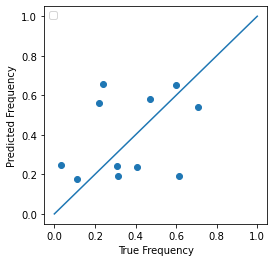

In [23]:
from scipy.stats import linregress as ols

regr = RandomForestRegressor()
regr.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(4,4))

predictions = regr.predict(X_test)

ax.scatter(y_test, predictions)
ax.plot((0,1), (0,1))

ax.legend()

ax.set(xlabel='True Frequency', ylabel='Predicted Frequency')

plt.show()